In [110]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 128) 

# T = Float64;

include("CosmoTimeStepExpr.jl")
include("CosmoCoeffExpr.jl")
include("CosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

const E = exp(T(1.));

const H = T(3.);
const Om = T(4.);
const tstar = T(1.);

In [111]:
Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;

zmin = T(0.);
zmax = T(.6);


DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [112]:
InitGuess = zeros(T,NVar,N);
zAH = T(0.5);
X = T(0.);
tinit = T(-3.)
p2 = 0;
inita4 = T(-50);
M  = T(1);
margin = 10;

In [113]:
t=tinit;
a4=inita4

(DS0(t)/36)*(18*M*(p2-M*X^2)+18*a4-5*M^4)+(M^2/144)*(32*X*DS1(t)-61*DS2(t))+3*M^2*DS1(t)^2/(16*DS0(t))

-25.13572718390098609752917951525097615091

In [114]:
X = T(1.23);
Var = copy(InitGuess);

for ii in 1:200
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit, margin);
    print("\rX = $X")
    flush(stdout)
end

X = 0.7517213617919240824027608614373415960231

In [92]:
# Having computed ξ(t_0), we change the grid so that it ends precisely at the apparent horizon, zmax = zAH
# This seemed to have made the code run better, but more testing would be good.

#Or let's try this instead.

initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(0);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);

In [93]:
InitVar = ComputeBulk(Var[1,1:N], initX, inita4, tinit);

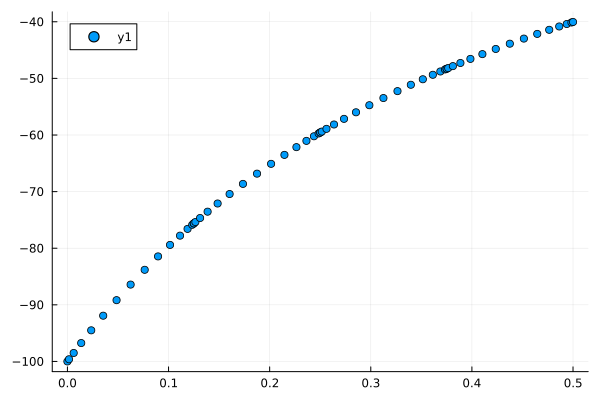

In [94]:
plt.scatter(grid,InitVar[5,:])

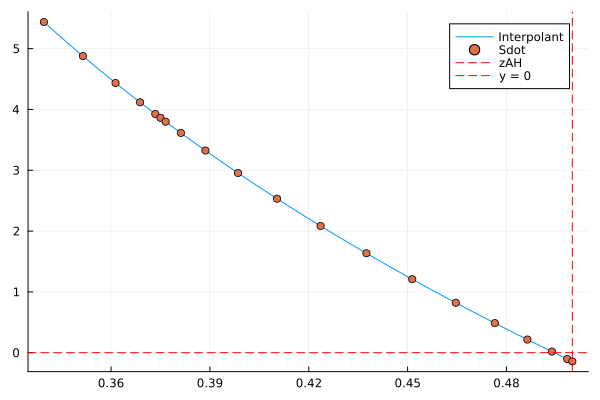

In [95]:
fig = PlotSdot(InitVar, initX,tinit, 40);
display(fig)

In [97]:
dt = T(.0005);

OutputArr = [];
MonitorArr = [];

Evolve(InitVar, initX, inita4, T(tinit), -1, dt, 20, OutputArr, MonitorArr)

◐ time = -2.968, constraint violation = 339028337325.197    Time: 0:00:01

LoadError: TaskFailedException

[91m    nested task error: [39mData contains `Inf` or `NaN` values and a fit cannot be performed
    Stacktrace:
      [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4merror.jl:44[24m[39m
      [2] [0m[1mcheck_data_health[22m[0m[1m([22m[90mxdata[39m::[0mVector[90m{Float64}[39m, [90mydata[39m::[0mVector[90m{Float64}[39m[0m[1m)[22m
    [90m    @[39m [32mLsqFit[39m [90m~/.julia/packages/LsqFit/rHpK1/src/[39m[90m[4mcurve_fit.jl:24[24m[39m
      [3] [0m[1mcurve_fit[22m[0m[1m([22m[90mmodel[39m::[0mvar"#model#BoundaryInterpolate##9", [90mxdata[39m::[0mVector[90m{Float64}[39m, [90mydata[39m::[0mVector[90m{Float64}[39m, [90mp0[39m::[0mVector[90m{Float64}[39m; [90minplace[39m::[0mBool, [90mkwargs[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
    [90m    @[39m [32mLsqFit[39m [90m~/.julia/packages/LsqFit/rHpK1/src/[39m[90m[4mcurve_fit.jl:131[24m[39m
      [4] [0m[1mcurve_fit[22m[0m[1m([22m[90mmodel[39m::[0mFunction, [90mxdata[39m::[0mVector[90m{Float64}[39m, [90mydata[39m::[0mVector[90m{Float64}[39m, [90mp0[39m::[0mVector[90m{Float64}[39m[0m[1m)[22m
    [90m    @[39m [32mLsqFit[39m [90m~/.julia/packages/LsqFit/rHpK1/src/[39m[90m[4mcurve_fit.jl:123[24m[39m
      [5] [0m[1mBoundaryInterpolate[22m[0m[1m([22m[90mVarVec[39m::[0mVector[90m{Float64}[39m[0m[1m)[22m
    [90m    @[39m [35mMain[39m [90m~/Documents/Holography with dynamic boundary/Reproducing-Dynamic-Holo/[39m[90m[4msolvers.jl:801[24m[39m
      [6] [0m[1mComputeODEMatrix[22m[0m[1m([22m[90mEqNum[39m::[0mInt64, [90mdomind[39m::[0mInt64, [90mVar[39m::[0mMatrix[90m{Float64}[39m, [90mVarZ[39m::[0mMatrix[90m{Float64}[39m, [90mVarZZ[39m::[0mMatrix[90m{Float64}[39m, [90mX[39m::[0mFloat64, [90mp2[39m::[0mFloat64, [90ma4[39m::[0mFloat64, [90mt[39m::[0mFloat64[0m[1m)[22m
    [90m    @[39m [35mMain[39m [90m~/Documents/Holography with dynamic boundary/Reproducing-Dynamic-Holo/[39m[90m[4msolvers.jl:177[24m[39m
      [7] [0m[1mmacro expansion[22m
    [90m    @[39m [90m~/Documents/Holography with dynamic boundary/Reproducing-Dynamic-Holo/[39m[90m[4msolvers.jl:209[24m[39m[90m [inlined][39m
      [8] [0m[1m(::var"#LinearSolveODE##36#LinearSolveODE##37"{var"#LinearSolveODE##38#LinearSolveODE##39"{Matrix{Float64}, Int64, Float64, Float64, Float64, Float64, Matrix{Float64}, Matrix{Float64}, Int64, Vector{Bool}, UnitRange{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:276[24m[39m
      [9] [0m[1m#LinearSolveODE##36[22m
    [90m    @[39m [90m./[39m[90m[4mthreadingconstructs.jl:243[24m[39m[90m [inlined][39m
     [10] [0m[1m(::Base.Threads.var"#threading_run##0#threading_run##1"{var"#LinearSolveODE##36#LinearSolveODE##37"{var"#LinearSolveODE##38#LinearSolveODE##39"{Matrix{Float64}, Int64, Float64, Float64, Float64, Float64, Matrix{Float64}, Matrix{Float64}, Int64, Vector{Bool}, UnitRange{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:177[24m[39m

...and 3 more exceptions.


In [ ]:
# using Serialization

# open("cosmo_until_t_minus1.dat","w") do io
#     serialize(io, OutputArr);
# end

In [62]:
TimeArr = [x[1][1] for x in OutputArr];
XArr = [x[2][1] for x in OutputArr];

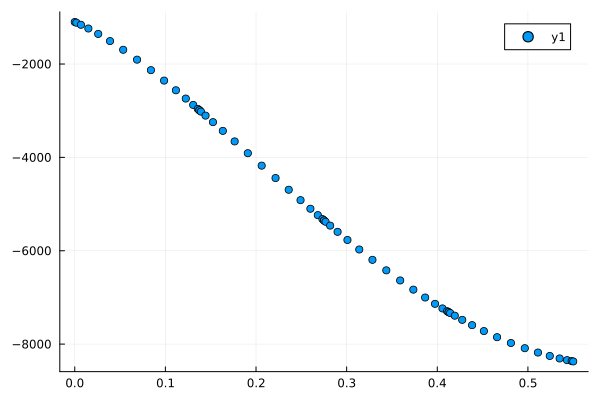

In [63]:
plt.scatter(grid,OutputArr[end][4][2,:])

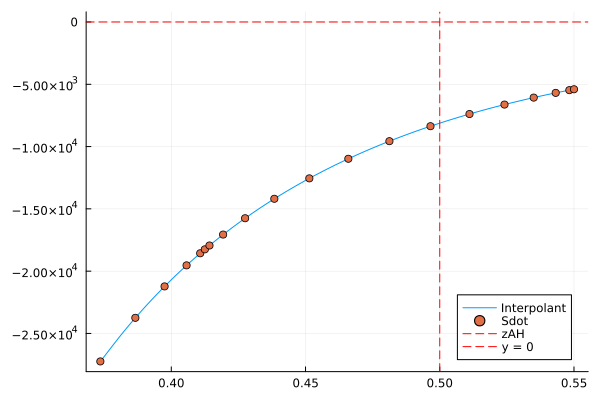

In [64]:
PlotSdot(OutputArr[end][4][:,:],XArr[end],TimeArr[end],40)

In [65]:
Energy = [x[1] for x in MonitorArr];
Momentum = [x[2] for x in MonitorArr];
Operator = [x[3] for x in MonitorArr];
Constraint = [x[4] for x in MonitorArr[2:end]];

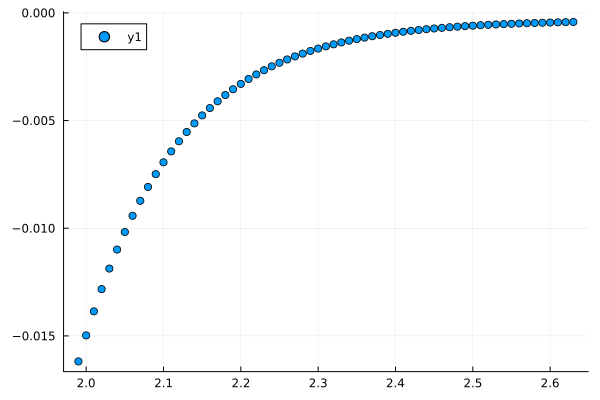

In [66]:
plt.scatter(TimeArr,Energy.+Momentum)

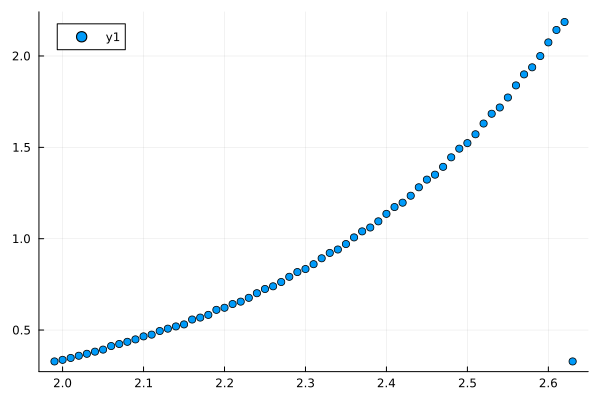

In [67]:
plt.scatter(TimeArr,Constraint)

In [42]:
VarM1 = copy(OutputArr[end][4][:,:]);
a4M1 = copy(OutputArr[end][3][1]);
XM1 = copy(OutputArr[end][2][1]);
tM1 = copy(OutputArr[end][1][1]);

In [46]:
dt = T(.0005);

OutputArr = [];
MonitorArr = [];

Evolve(VarM1, XM1, a4M1, tM1, 5, dt, 20, OutputArr, MonitorArr)

◓ time = 2.000, constraint violation = 0.328    Time: 0:53:08m

LoadError: InterruptException:

In [ ]:
# using Serialization

# open("cosmo__tM1_tP1.dat","w") do io
#     serialize(io, OutputArr);
# end

In [56]:
VarP1 = copy(OutputArr[end][4][:,:]);
a4P1 = copy(OutputArr[end][3][1]);
XP1 = copy(OutputArr[end][2][1]);
tP1 = copy(OutputArr[end][1][1]);

In [58]:
dt = T(.0005);

OutputArr = [];
MonitorArr = [];

Evolve(VarP1, XP1, a4P1, tP1, 5, dt, 20, OutputArr, MonitorArr)

◐ time = 2.639, constraint violation = 2.248    Time: 0:11:41

LoadError: InterruptException: